# **Hypothesis Testing**

<p align = "justify"> Inferential statistics consists of a set of procedures that enables us to draw conclusions about the characteristics of a whole population by studying the properties of a sample of a population.</p>
 
**Remember:** Hypotheses are always **statements about the population** or distribution under study, **not statements about the sample**.

> ## **General Procedures for Hypothesis Testing**

> Hypothesis testing procedures rely on using the information in a random sample from the population.

> **1.** Identify parameters of interest

> **2.** State null and alternative hypothesis

> **3.** Select a significance level $\alpha$

> **4.** Determine the appropriate test statistics

> **5.** Calculate test statistics

> **6.** Calculate rejection criteria and compute p-value

> **7.** Make statistical decision and interpret results


Let elaborate on each step on the testing procedure.

### **1. Identify parameters of interest**

#### **Known Population Parameters vs Unkown Population Parameters**

A statistical hypothesis can be thought of as a statement about the probability distribution of a random variable.

\
We have a random $X_1$, $X_2$,..., $X_n$ from a normal population. Sample mean $\bar{X}$ is an estimate of the true population mean $\mu$, and therefore, it is the **test statistic**.

\

If the information obtained from a random sample of a population is consistent with the hypothesis, we do not reject hypothesis. Otherwise we reject the hypothesis. 

\

Hypothesis-testing procedure should be developed with the probability of reaching a wrong conclusion in mind since we do not work with the entire population but a random sample of it.



### **2. State null and alternative hypotheses**

##### **Hypothesis Tests on Mean**

Suppose that we wish to test the hypotheses:
<p align = "center"> $H_0$ : $\mu$ = $\mu_0$

<p align = "center"> $H_1$ : $\mu$ $\ne$ $\mu_0$ </p>

\
A sample mean $\bar{x}$ that falls close to the hypothesized value of the population mean $\mu$ does **not** conflict with the null hypothesis $H_0$. 

On the other hand, a sample mean $\bar{x}$ that considerably different from the population mean $\mu$ supports the alternative hypothesis $H_1$.


### **3. Select a significance level  𝛼  and the critical value**

Sample mean may take different values. Therefore, we find an interval for sample mean $\bar{x}$ that forms a region for which we will fail to reject the null hypothesis. This is also called **acceptance region**.

\

A sample mean falls outside of this region favors the alternative hypothesis $H_1$, where we reject the null hypothesis. This is also called **critical region**.

\

The boundaries between the critical and acceptance region are called **critical values**.

\




Since we make assumptions for a population over a random sample of it, there is always a chance for being led to wrong conclusions. For example, after the test, we may observe that $\bar{x}$ falls into the critical region and reject the null hypothesis $H_0$ while it was true. This error leads to **Type I error**.

\

In the opposite case, we may fail to reject the null hypothesis while it was false. This error is called **Type II error**.

\

> The probability of making Type I error is called **significance level** and denoted by *$\alpha$*. This error is also known as the **sample size error**.

\

<p align = "center"> $\alpha$ = Significance level = P(Type I error) = P(Reject $H_0$ when $H_0$ is true) </p>

\

> The probability of making Type II error is denoted by $\beta$ or $\beta$-error.

\
<p align = "center"> $\beta$ = $\beta$-error = P(Type II error) = P(Fail to reject $H_0$ when $H_0$ is false) </p>

\

> The power of a statistical test is the probability of correctly rejecting the null hypothesis $H_0$ when the alternative hypothesis $H_1$ is true. Power is the **sensitivity** of the statistical test and it shows the percentage of correctly rejecting $H_0$. If the power of the test is low, we may increase the sample size *n* or $\alpha$.
<p align = "center"> Power = 1 - $\beta$

\

Let's take a closer look to test regions based on a sampling distribution.



#### **a. Sampling Distribution for Two-Tailed Test**

Let's assume $\bar{X}$ has a normal distribution with mean $\mu_0$ and standard deviation $\sigma$/$\sqrt{n}$ if the null hypothesis is true. We can calculate a  p-value or construct a critical region based on a computed value of the sample mean $\bar{X}$.

It is usually convenient to standardize the sample mean $\bar{x}$ and calculate test statistics based on a standard normal distribution.

Since the sample mean is normally distributed with mean = 0 and variance = 1, it has an area under the curve of 1 (*~N(0,1)*). 


Assume $\alpha$ = 0.05 *(significance level)*

> ***Critical Region can be visualized as follows:*** 

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

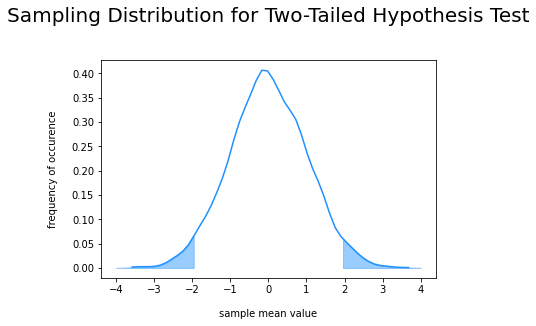

In [ ]:
#@title
values = np.random.normal(loc=0, scale=1, size=6000)
alpha_05_positive = np.mean(values) + np.std(values)*1.96
alpha_05_negative = np.mean(values) - np.std(values)*1.96
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values))
plt.plot(pos, kde(pos), color='dodgerblue')
shade = np.linspace(alpha_05_positive, 4, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')
shade2 = np.linspace(alpha_05_negative, -4, 300)
plt.fill_between(shade2, kde(shade2), alpha=0.45, color='dodgerblue')
plt.title("Sampling Distribution for Two-Tailed Hypothesis Test", y=1.15, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

> ***Acceptance Region can be visualized as follows:***

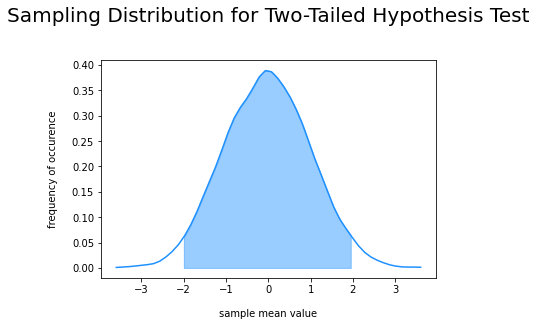

In [ ]:
#@title
values = np.random.normal(loc=0, scale=1, size=6000)
alpha_05_positive = np.mean(values) + np.std(values)*1.96
alpha_05_negative = np.mean(values) - np.std(values)*1.96
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values))
plt.plot(pos, kde(pos), color='dodgerblue')
shade = np.linspace(alpha_05_negative, alpha_05_positive, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')
#shade2 = np.linspace(alpha_05_negative, -4, 300)
#plt.fill_between(shade2, kde(shade2), alpha=0.45, color='dodgerblue')
plt.title("Sampling Distribution for Two-Tailed Hypothesis Test", y=1.15, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

#### **b. Sampling Distribution for Lower-Tailed Test**

$H_0$ : $\mu$ = $\mu_0$

$H_1$ : $\mu$ $\gt$ $\mu_0$

$\alpha$ = 0.05

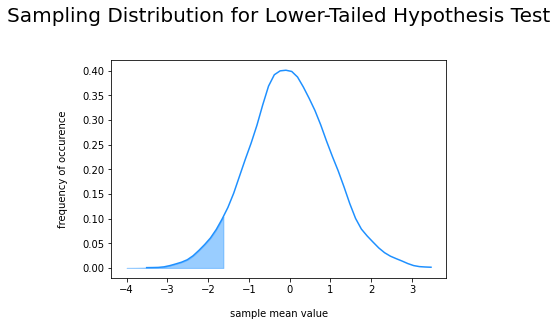

In [ ]:
#@title
values = np.random.normal(loc=0, scale=1, size=6000)
two_std_from_mean = np.mean(values) - np.std(values)*1.645
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values))
plt.plot(pos, kde(pos), color='dodgerblue')
shade = np.linspace(two_std_from_mean, -4, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')
plt.title("Sampling Distribution for Lower-Tailed Hypothesis Test", y=1.15, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

#### **c. Sampling Distribution for Upper-Tailed Test**

$H_0$ : $\mu$ = $\mu_0$

$H_1$ : $\mu$ $\lt$ $\mu_0$

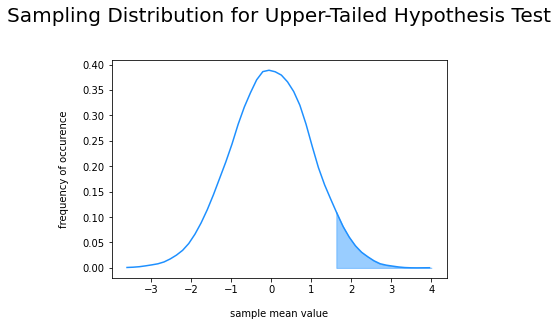

In [ ]:
#@title
values = np.random.normal(loc=0, scale=1, size=6000)
two_std_from_mean = np.mean(values) + np.std(values)*1.645
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values))
plt.plot(pos, kde(pos), color='dodgerblue')
shade = np.linspace(two_std_from_mean, 4, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')
plt.title("Sampling Distribution for Upper-Tailed Hypothesis Test", y=1.15, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

### **4 & 5. Determine the appropriate test statistics & Calculate test statistics**

> #### **Z-test**

Assume that mean $\mu$ and variance $\sigma^2$ of population are **known**. The reference distribution is **z-distribution** and test statistics is **z-test**. 
<p align = "center"> $Z_0$ = $\frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}$ </p>

* **$\sigma$** : population standard deviation
* **n** : sample size


**Standard Error** : SE = $\frac{\sigma}{\sqrt{n}}$




> #### **T-test**

Suppose we wish to test hypothesis on the mean of a population with **unknown variance** $\sigma^2$:


The test procedure relies where $X_1$, $X_2$, $X_3$,..., $X_n$ is a random sample from a normal distribution with mean $\mu$ and variance $\sigma^2$. The reference distribution is **t-distribution** and test statistics is **t-test**. The random variable has a t-distribution with ***n-1*** degrees of freedom.

<p align = "center"> $T_0 = \frac{\bar{X}-\mu_0}{S/\sqrt{n}}$




### **6 & 7. Calculate rejection criteria and compute p-value & Make statistical decision and interpret results**

Critical regions can be presented as test statistics (*z-test or t-test*) or in the computed value of the sample mean $\bar{x}$.

> **Z-test**

<p align = "center"> Acceptance region: $-z_{\alpha/2} \le z_0 \le z_{\alpha/2}$

<p align = "center"> Confidence interval: $\mu_0 - z_{\alpha/2}\sigma/\sqrt{n} \le \mu \le \mu_0 + z_{\alpha/2}\sigma/\sqrt{n}$

> **T-test**

<p align = "center"> Acceptance region: $-t_{\alpha/2, n-1} \le t_0 \le t_{\alpha/2, n-1}$

<p align = "center"> Confidence interval: $\mu_0 - t_{\alpha/2, n-1}s\sqrt{n} \le \mu \le \mu_0 + t_{\alpha/2, n-1}s/\sqrt{n}$

\

*p-value* is the observed significance level. It conveys information about the weight of evidence against the null hypothesis  $𝐻_0$. Therefore, we can draw conclusions at any specified significance level and mitigate the risk of  𝛼.

> **p-value for Z-test**

<p align = "center"> P = 2*P(1- $\Phi(|z_0|))$

> **p-value for T-test**

<p align = "center"> P = 2*P($T_{n-1} \gt |t_0|)$

## **Example 1**
<p align = "justify"> A manufacturer produces crankshafts for an automobile engine. The wear of the crankshaft after 100,000 miles (0.0001 inch) is of interest because it is likely to have an impact on warranty claims. A random sample of n=15 shafts is tested and $\bar{x}$ = 2.78. It is known that $\sigma$ = 0.9 and that wear is normally distributed. </p>

##### a) Test $H_0$: $\mu$ = 3 versus $H_1$= $\mu$ $\ne$ 3 using $\alpha$ = 0.05.




> We first **identify the parameters**:

> n = 15

> $\sigma$ = 0.9 *(Population variance is known)*

> $\bar{x}$ = 2.78


In [ ]:
x_bar = 2.78
mu=3
std = 0.9
n=15


> Then we **state the null and alternative hypotheses**:

> $H_0$: $\mu$ = 3 

> $H_1$= $\mu$ $\ne$ 3

> The significance level of the test (*$\alpha$*) is given as 0.05.

> Since the variance is known, we apply z-test *(test statistics)*

> $Z_0$ = $\frac{\bar{X}-\mu_0}{SE}$

\

> **Now let's find test statistics.**


> First, we find SE:

> SE = $\frac{\sigma}{\sqrt{n}}$

In [ ]:
SE = std/math.sqrt(n)
print(SE)

0.232379000772445


> Then, z-distribution:

In [ ]:
z0 = (x_bar-mu)/SE
print(z0)

-0.9467292624062583


-0.95 falls between -1.96 and 1.96.

 **Let's find critical values and the acceptance region**

In [ ]:
if (z0 > -(norm.ppf(0.025)) and z0 < norm.ppf(0.025)):
    Hypothesis_Status = 'Reject Null Hypothesis : Significant'
else:
    Hypothesis_Status = 'Do not reject Null Hypothesis : Not Significant'

print(Hypothesis_Status)

z_positive = mu + (abs(norm.ppf(0.025))*SE)
z_negative = mu - (abs(norm.ppf(0.025))*SE)
print('Confidence interval is between', z_negative, 'and', z_positive,'.')

Do not reject Null Hypothesis : Not Significant
Confidence interval is between 2.5445455277226023 and 3.4554544722773977 .


***Critical values*** are ***2.54*** and ***3.45***

***Acceptance region*** is within ***$2.54 \lt \bar{x} \lt 3.45$*** --> Fail to Reject $H_0$

Result: Fail to Reject.

**Let's find *p*-value**

In [ ]:
#p_value = round(1-stats.norm.cdf(z0), 3)
pvalue = 2*(1 - norm.cdf(abs(z0)))
print(p_value)
if (pvalue < 0.05):
    Hypothesis_Status = 'Reject Null Hypothesis : Significant'
else:
    Hypothesis_Status = 'Do not reject Null Hypothesis : Not Significant'
print(Hypothesis_Status)

0.025000000000003908
Do not reject Null Hypothesis : Not Significant


*p*-value $\gt$ 0.05. Fail to reject $H_0$

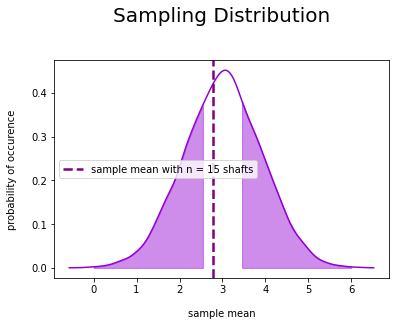

In [ ]:
#@title
sample_means = np.random.normal(loc=3, scale=0.9, size=10000)
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='darkviolet')
shade = np.linspace(z_positive, 6,15)
plt.fill_between(shade, kde(shade), alpha=0.45, color='darkviolet')
shade2 = np.linspace(0, z_negative, 15)
plt.fill_between(shade2, kde(shade2), alpha=0.45, color='darkviolet')
plt.axvline(x=2.78, linestyle='--', linewidth=2.5, label="sample mean with n = 15 shafts", c='purple')
plt.title("Sampling Distribution", y=1.15, fontsize=20)
plt.xlabel("sample mean", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.legend();

##### b) What is the power of this test if $\mu$ = 3.25?

> Suppose the null hypothesis $H_0$ is false and the true value of the mean is

> $\mu = \mu_0 + \delta$, where $\delta \gt 0$.

> Then, the z-distribution ($Z_0$) when $H_1$ is true:

> $Z_0$ ~ $N(\frac{\delta\sqrt{n}}{\sigma}, 1)$

> If we know the true mean of the population, we can find the power of test as:

> **Power** = 1- $\beta$

> Knowing the true value of the population mean, the $\beta$-error will also be revised as:

> $\beta = \Phi$ $(z_{\alpha/2}- \frac{\delta\sqrt{n}}{\sigma}) - \Phi$ $(-z_{\alpha/2} - \frac{\delta\sqrt{n}}{\sigma})$

Given that the significance level $\alpha$ = 0.05:

In [ ]:
zp_critical = norm.ppf(0.025)-(((3.25-3)*math.sqrt(15))/0.9)
zn_critical = -(norm.ppf(0.025))-(((3.25-3)*math.sqrt(15))/0.9)
zp_new = norm.cdf(abs(zp_critical))
zn_new = norm.cdf(abs(zn_critical))
beta = zp_new - zn_new
power = 1-beta
print(beta, power)

0.18711207465963453 0.8128879253403655


The probability of correctly rejecting a false null hypothesis is ~0.81 when $\mu$ = 3.25 and n = 15.

> The probability of Type II error ($\beta$) depends on the choice of sample size. Change in sample size will increase the power of the test.

> n = $\frac{(z_{\alpha/2}+z_{\beta})^2\sigma^2}{\delta^2}$

> n = $\frac{(z_{0.025}+z_{0.10})^2\sigma^2}{\delta^2}$

## **Example 2**

Test of $\mu$= 12 vs $\mu \ne$ 12

    |Variable  | N  |  Mean   |  StDev  |  SE Mean  |   T   |   P  |
    |----------|----|---------|---------|-----------|-------|------|
    |x         | 10 |  12.564 |  ?      |  0.296    |   ?   |   ?  |

##### a) Is this is a one-sided or two-sided test?

In [ ]:
#@title
Two-sided test

##### b) How many degrees of freedom are there on the t-test statistics?

n-1 = 9

##### c) Fill in the missing values. What conclusion would you draw?

> **Let's identify the test parameters**

> n : sample size

> $\bar{x}$ : sample mean

> S : Sample standard deviation

> SE ($S_{\bar{x}}$) : Estimated standard error (SE) of the mean

In [ ]:
n = 10
mu=12
x_bar = 12.564
se_mean = 0.296
dof = 9



$SE = \frac{S}{\sqrt{n}}$

In [ ]:
st_dev = se_mean*math.sqrt(n)
st_dev

0.9360341874098403

$T_0 = \frac{\bar{X}-\mu_0}{S/\sqrt{n}}$

In [ ]:
t0 = (x_bar-mu)/(se_mean)
p_value = 2*(1- stats.t.cdf(t0,dof))

print(t0, p_value)

stats.t.ppf(0.005,16)

1.9054054054054057 0.08911434358019843


-2.9207816223499976

Let's find the two-sided confidence interval on the mean.

In [ ]:
t_negative = mu - (abs(stats.t.ppf(0.025,9))*SE)
t_positive = mu + (abs(stats.t.ppf(0.025,9))*SE)
print(t_negative, t_positive)
#98.6-(abs(stats.t.ppf(0.025,24))*(0.4861/math.sqrt(25)))

11.474322178932018 12.525677821067982


## **Empirical Analysis**

In many real-life problems, the relationship between variables is not deterministic and cannot be predicted perfectly.


The collection of statistical tools to explore relationships between variables that are related to a nondeterministic manner is called **regression analysis**. The widely-used regression analysis techniques:
1. Simple Linear Regression - *one predictor variable and a response variable*
2. Multiple Linear Regression - *multiple predictor variables and a response variable*



### **Simple Linear Regression**

> A single regressor x (*predictor*) and a dependent y (*response*) variable.

Suppose there is a true relationship between x and y on a straight line, where the observation of y at each level of x is a random variable.

<p align = "center"> E(Y|x) = $\beta_0 + \beta_1x$ </p>

> $\beta_0$ and $\beta_1$ are unknown regression coefficients.

> $\epsilon$ is a random variable with $\mu = 0$ and unknown variance $\sigma^2$. Random errors are uncorrelated random variables.

Regression coefficients should result in a line that is a "best fit" to the data. Assume sample size is n, then each pair of observation x and y will satisfy:

<p align = "center">  $y_i = \hat{\beta_0} + \hat{\beta_1}x_i + \epsilon_i,          i = 1,2,..n $

> **The fitted regression line:**

<p align = "center">  $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$

Therefore, the **residual** : $\epsilon_i = y_i - \hat{y}_i$. The residual describes the error in the fit of the model for each observation *i*. 

### **Multiple Linear Regression**

> Multiple regressor variables (*$x_1, x_2,...,x_k$*) and one response variable *y*.

Similar to the simple linear regression equation, the multiple linear regression with *k* variables can be shown as: 

<p align = "center">  $Y = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + ...+ \hat{\beta_k}x_k + \epsilon$

In this regression model, we may also combine regressors to assess their interaction effects in the model. For example:

<p align = "center">  $Y = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_{1,2}}x_1x_2 + \epsilon$

Consider that we have n observation (*sample size*) and k variable. We should consider the multiple regression in a matrix format since there are multiple observations for multiple variables. Then each pair of observations will satisfy: 

<p align = "center"> $y_i = \hat{\beta_0} + \hat{\beta_1}x_{i,1} + \hat{\beta_2}x_{i,2} + ...+ \hat{\beta_k}x_{i,k} + \epsilon_i, i = 1,2,...n$

<p align = "center"> $y_i = \beta_0 + \sum_{j=1}^k \beta_jx_{i,j} + \epsilon_i, i = 1,2,...n$


#### **Example 3**
Let's focus on a simple dataset:

In [ ]:
#@title
#import pandas as pd
#temp_data = {'Month':['Jan', 'Feb', 'Mar', 'Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],
#        'Temp':[21, 24, 32, 47,50,59,68,74,62,50,41,30], 'Usage':[185.79,214.47,288.03,424.84,454.58,539.03,621.55,675.06,562.03,452.93,369.95,273.98]}
#temp_datadf = pd.DataFrame(temp_data)
#print(temp_datadf)

Assume that we have MPG performance and engine displacement for a sample of n = 20 cars. 

In [ ]:
#@title
import pandas as pd
cars = {'Make - Model':['Acura - Legend','BMW - 735i','Buick - Regal', 'Chevrolet - Cavalier','Chevrolet - Celebrity', 'Chrysler - Conquest', 'Dodge - Aries', 
                 'Dodge - Dynasty', 'Ford - Escort', 'Ford - Mustang', 'Ford - Taurus', 'Ford - Tempo', 'Honda - Accord', 
                 'Mazda - RX-7', 'Mercedes - 260E', 'Mercury - Tracer', 'Nissan - Maxima', 'Oldsmobile - Cutlass', 
                 'Plymouth - Laser', 'Pontiac - Grand Prix'],
        'MPG':[30,19,29,32,30,24,30,28,31,25,27,33,30,23,24,29,26,29,37,29],
        'EngDis':[97,209,173,121,151,156,135,181,114,302,153,90,119,80,159,97,181,173,122,173]}
cars_df = pd.DataFrame(cars)
cars_df.style

,Make - Model,MPG,EngDis
0,Acura - Legend,30,97
1,BMW - 735i,19,209
2,Buick - Regal,29,173
3,Chevrolet - Cavalier,32,121
4,Chevrolet - Celebrity,30,151
5,Chrysler - Conquest,24,156
6,Dodge - Aries,30,135
7,Dodge - Dynasty,28,181
8,Ford - Escort,31,114
9,Ford - Mustang,25,302


In [ ]:
cars_df

,Make - Model,MPG,EngDis
0,Acura - Legend,30,97
1,BMW - 735i,19,209
2,Buick - Regal,29,173
3,Chevrolet - Cavalier,32,121
4,Chevrolet - Celebrity,30,151
5,Chrysler - Conquest,24,156
6,Dodge - Aries,30,135
7,Dodge - Dynasty,28,181
8,Ford - Escort,31,114
9,Ford - Mustang,25,302


##### **What are the regression coefficients?**

In [ ]:
#@title
model_ex3 = sm.OLS(cars_df.MPG,cars_df.EngDis)
results_ex3 = model_ex3.fit()
results_ex3.summary()

In [ ]:
import numpy as np
import statsmodels.api as sm

x = cars_df.EngDis
y = cars_df.MPG
X = sm.add_constant(x)
slr = sm.OLS(y, X).fit()
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4.532
Date:                Wed, 26 Aug 2020   Prob (F-statistic):             0.0473
Time:                        05:28:13   Log-Likelihood:                -53.272
No. Observations:                  20   AIC:                             110.5
Df Residuals:                      18   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5348      2.614     12.829      0.0

In [ ]:
predictions = slr.predict(X)
print(predictions)

0    30.10
1    26.14
2    27.41
3    29.25
4    28.19
5    28.01
6    28.76
7    27.13
8    29.50
9    22.84
10   28.12
11   30.35
12   29.32
13   30.70
14   27.91
15   30.10
16   27.13
17   27.41
18   29.22
19   27.41
dtype: float64


In [ ]:
#@title
ax1 = cars_df.plot.scatter(x='EngDis', y='MPG')

### **Properties of Least Square Estimators:**

Regression coefficients that we found in the regression model are the least square estimates of the intercept and slope. They can also be calculated manually. These equations are called as **least squares normal equations**.

<p align = "center"> $\hat{\beta_0} = \bar{y} - \hat{b}_1\bar{x}$

<p align = "center"> $\hat{\beta_1} = \frac{S_{xx}}{S_{xy}}$ 

> where, 

> $S_{xx} = \sum_{i=1}^n x_i^2 - \frac{(\sum_{i=1}^n x_i)^2}{n}$

> $S_{xy} = \sum_{i=1}^n y_ix_i - \frac{(\sum_{i=1}^n y_i)(\sum_{i=1}^n x_i)}{n}$

> and 

> $\bar{y} = (1/n)\sum_{i=1}^n y_i$ and $\bar{x} = (1/n)\sum_{i=1}^n x_i$

Therefore, the fitted regression line:

> $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x$, 

where each pair of observation satisfies:

> $y_i = \hat{\beta}_0 + \hat{\beta}_1x_i + \epsilon_i$,

and the residual equals:

> $\epsilon_i = y_i - \hat{y}_i$

\

Just as in simple linear regression, properties of least square estimators follow similar estimations but in a matrix form.

**Let's calculate regression coefficients manually:**

In [ ]:
import scipy
data_size = 20
sumx=0
sumy=0
sumxy=0
sumsqx=0

for i in range(len(cars_df)):
   sumx = cars_df['EngDis'][i]+sumx

for i in range(len(cars_df)):
   sumsqx = (cars_df['EngDis'][i]**2)+sumsqx

for i in range(len(cars_df)):
   sumy = cars_df['MPG'][i]+sumy

for i in range(len(cars_df)):
   sumxy = cars_df['EngDis'][i]*cars_df['MPG'][i]+sumxy

sxx = sumsqx-((sumx**2)/data_size)

sxy = sumxy - ((sumx*sumy)/data_size)

b1= sxy/sxx

b0 = (sumy/data_size) - (b1*(sumx/data_size))

print(b0, b1, b0+abs(b1))

33.53478390129696 -0.03539707904418595 33.57018098034115


> There is one predictor coefficient only since it is simple linear regression.

> $\hat{\beta_0}$ = 33.5358 

> $\hat{\beta_1}$ = -0.0354

**Practical Interpretation:** Using a simple linear regression model between mpg and engine displacements, we would predict the MPG of $\hat{y}$ = %33.57 when the engine displacement x = 1.00%. 

This is not a strong evidence that these two parameters have a strong relationship. In addition, there is always an error on these estimates since they are predictions.

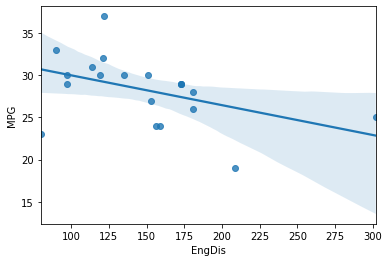

In [ ]:
#@title
ax = sns.regplot(x="EngDis", y="MPG", data=cars_df)

### **Use of t-tests**

In the regression analysis, independent (*predictor*) variables x are fixed. Therefore, the coefficient estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ depend on the observed response (*response*) variables.

For example, $\hat{\beta}_1$ is the linear combination of observations Y. Therefore we can show it as:

<p align = "center"> E[$\hat{\beta}_1$] = $\beta_1$ </p>

In other words, $\hat{\beta}_1$ is the **unbiased estimator** of the **true slope of the population** $\beta_1$.

Similarly, $\hat{\beta}_0$ is the unbiased estimator of the **true intercept of the population** $\beta_0$.

The estimate of variance $\hat{\sigma}^2$ can be used to estimate the variance and slope $\beta_1$ and intercept $\beta_0$. We call the squared root of the resulting variance estimators as the **estimated standard errors** of the slope $se(\hat{\beta}_1)$ and intercept $se(\hat{\beta}_0)$.

<p align = "center"> $se(\hat{\beta}_0) = \sqrt{\hat{\sigma}^2[\frac{1}{n}+\frac{\bar{x}^2}{S_{xx}}]}$

<p align = "center"> $se(\hat{\beta}_1) = \sqrt{\frac{\hat{\sigma}^2}{S_{xx}}}$

Suppose we want to test the hypotheses that the slope equals a constant: 

<p align = "center"> $H_0$ : $\beta_1$ = $\beta_{1,0}$

<p align = "center"> $H_1$ : $\beta_1$ $\ne$ $\beta_{1,0}$ </p>

Similarly, let's define the hypotheses that the intercept equals a constant:

<p align = "center"> $H_0$ : $\beta_0$ = $\beta_{0,0}$

<p align = "center"> $H_1$ : $\beta_0$ $\ne$ $\beta_{0,0}$ </p>

Recall the hypothesis testing procedures:

> Test statistic: 

<p align = "center"> $T_0 = \frac{\hat{\beta}_1-\beta_{1,0}}{se(\hat{\beta}_1)}$

<p align = "center"> $T_0 = \frac{\hat{\beta}_0-\beta_{0,0}}{se(\hat{\beta}_0)}$

> We will accept the null hypothesis if:

> $t_{-\alpha/2, n-p} < |t_0| < t_{\alpha/2, n-p}$

#### **Significance of Regression**

Let's focus on a special case of the hypotheses:

<p align = "center"> $H_0$ : $\beta_1$ = 0

<p align = "center"> $H_1$ : $\beta_1$ $\ne$ 0 </p>

In such case, accepting the null hypothesis means that there is no linear relationship between x and y. 
> This result may indicate either that x is of little value explaining the variation in Y or the true relationship between x and y is not linear.

Rejecting the null hypothesis means that there is a linear relationship between x and y.
> This result may indicate that x is of value in explaining the variability in y and the straight-line model is adequate.

Similarly, the significance of regression test determines whether a linear relationship exists between the response variable and a subset of the regressor variables, shown as:

<p align = "center"> $H_0$ : $\beta_1 = \beta_2 = ... = \beta_k$ = 0

<p align = "center"> $H_1$ : $\beta_j$ $\ne$ 0, for at least one j </p>

Rejecting the null hypothesis means that at least one of the regressors have a significant contribution to the model.

#### Let's recall **Example 3** and test the significance of regression for simple linear regression:

$H_0$ : $\beta_1$ = 0

$H_1$ : $\beta_1$ $\ne$ 0

In [ ]:
cars_df

,Make - Model,MPG,EngDis
0,Acura - Legend,30,97
1,BMW - 735i,19,209
2,Buick - Regal,29,173
3,Chevrolet - Cavalier,32,121
4,Chevrolet - Celebrity,30,151
5,Chrysler - Conquest,24,156
6,Dodge - Aries,30,135
7,Dodge - Dynasty,28,181
8,Ford - Escort,31,114
9,Ford - Mustang,25,302


In [ ]:
slr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.157   
Dependent Variable: MPG              AIC:                110.5440
Date:               2020-08-19 01:13 BIC:                112.5354
No. Observations:   20               Log-Likelihood:     -53.272 
Df Model:           1                F-statistic:        4.532   
Df Residuals:       18               Prob (F-statistic): 0.0473  
R-squared:          0.201            Scale:              13.392  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     33.5348     2.6140   12.8291   0.0000   28.0431   39.0265
EngDis    -0.0354     0.0166   -2.1287   0.0473   -0.0703   -0.0005
-----------------------------------------------------------------
Omnibus:               2.614        Durbin-Watson:          1.642
Prob(Omnibus):         0.271        Jarque-Bera (JB):       1.072
Skew:                  -0.482       Prob(JB):               0.585
Kurtosis:              3.596        Condition No.:          502  
=================================================================

"""

In [ ]:
slr.params[0], slr.params[1]

(33.53478390129697, -0.03539707904418601)

In [ ]:
dof = 18
se = slr.bse

t_critical = stats.t.isf(0.025, dof)
print(t_critical)

t_intercept = (slr.params[0]-0)/slr.bse[0]
print(t_intercept)

t_slope = (slr.params[1]-0)/slr.bse[1]
print(t_slope)

if (t_slope > t_critical):
    Hypothesis_Status = 'Reject Null Hypothesis : Significant'
else:
    Hypothesis_Status = 'Do not reject Null Hypothesis : t-value is NOT statistically significant'

p_value = (1- stats.t.cdf(t_critical,dof))
print(p_value)

print(Hypothesis_Status)

2.10092204024096
12.829097274360947
-2.1287496788428366
0.025000000000003908
Do not reject Null Hypothesis : t-value is NOT statistically significant


**Let's find p-values for t-test**:

In [ ]:
p_value_1 = 2*(1- stats.t.cdf(abs(t_intercept), data_size-2))
p_value_2 = 2*(1- stats.t.cdf(abs(t_slope), data_size-2))
print(p_value_1, p_value_2)

1.708899688424026e-10 0.04734037583668704


> This means that no strong evidence that show $\beta_1 \ne 0$.

#### **Analysis of Variance (ANOVA) Approach to Test Significance of Regression**

This approach relies on the total variability in the response variable into the meaningful components.

This can be explained by the amount of variability in each prediction explained by the regression line and the residual variation left unexplained by the regression line.

> Let's dive into it:

Recall what the residual is. The residual is the error in the fit of the model for each observation of y. 

> **Sum of squares of the residuals are called error sum of squares ($SSE$)**:

$SSE = \sum_{i=1}^n (y_i-\hat{y}_i)^2$

\

The expected value of SSE:

$ E[SSE] = (n-2)\sigma^2$

The variance of error term $\sigma^2$ is unknown. The residuals are used to obtain an estimate of $\sigma^2$.

\

> **Unbiased estimator of variance $\sigma^2$**:

$\hat{\sigma}^2 = \frac{SSE}{n-2}$

\

> **Total sum of squares of the response variable y**:

$SST = \sum_{i=1}^n (y_i-\bar{y})^2$

\

SSE can also be found as:

$SSE = SST - \hat{\beta}_1S_{xy}$

\

> **Regression sum of squares can be presented as**:

$SSR = \sum_{i=1}^n (\hat{y}_i-\bar{y}_i)^2$

\

Shortly,


$SST = SSR + SSE$

\

**Coefficient of Determination is shown as**:

This is used to measure the adequacy of the regression model. it is also presented as the square of the correlation coefficient between x and y.

We need to be careful about the $R^2$ value since the value may sometimes be misleading. For example, as long as we add new variables to the model, $R^2$ keeps increasing even though it does not necessarily mean that the model becomes more meaningful.

**Important note**: $R^2$ does not measure the appropriateness of the model since it can be manipulated by adding more variables to the model. Therefore, obtaining a large $R^2$ does not imply that the regression model provides accurate predictions of future observations.

$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$

\

Because of this concern, we can refer to **adjusted $R^2$** to assess the fit of the model.  

> $Adj-R^2 = R_{adj}^2 = 1 - \frac{SSE/(n-p)}{SST/(n-1)}$

**Important note**: $R_{adj}^2$ only increases if the new variable reduces the error mean square. This statistic penalizes the analysts for adding terms to the model and protects the model against **overfitting**. This is an important statistic to be used in **variable selection**.

To test if the null hypothesis is true, we apply f-statistics:

<p align = "center"> $F_0 = \frac{SSR/k}{SSE/(n-p)} = \frac{MSR}{MSE}$

> MSE and MSR are called mean squares. As shown in the formula: MSE = $\hat{\sigma}^2$

We reject the null hypothesis if $f_0 \gt f_{\alpha,1,n-p}$

Just as in simple linear regression, residual estimators and ANOVA approach follow the same structure but in a matrix form.

#### Let's see how it works. Recall **Example 3**: 

In [ ]:
slr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.157   
Dependent Variable: MPG              AIC:                110.5440
Date:               2020-08-19 02:25 BIC:                112.5354
No. Observations:   20               Log-Likelihood:     -53.272 
Df Model:           1                F-statistic:        4.532   
Df Residuals:       18               Prob (F-statistic): 0.0473  
R-squared:          0.201            Scale:              13.392  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     33.5348     2.6140   12.8291   0.0000   28.0431   39.0265
EngDis    -0.0354     0.0166   -2.1287   0.0473   -0.0703   -0.0005
-----------------------------------------------------------------
Omnibus:               2.614        Durbin-Watson:          1.642
Prob(Omnibus):         0.271        Jarque-Bera (JB):       1.072
Skew:                  -0.482       Prob(JB):               0.585
Kurtosis:              3.596        Condition No.:          502  
=================================================================

"""

In [ ]:
predictions

0    30.10
1    26.14
2    27.41
3    29.25
4    28.19
5    28.01
6    28.76
7    27.13
8    29.50
9    22.84
10   28.12
11   30.35
12   29.32
13   30.70
14   27.91
15   30.10
16   27.13
17   27.41
18   29.22
19   27.41
dtype: float64

Let's find **residuals**:

In [ ]:
sse = 0
ssr = 0
for i in range(len(cars_df)):
   sse = math.pow((cars_df['MPG'][i] - predictions[i]),2) + sse

for i in range(len(cars_df)):
   ssr = math.pow((predictions[i] - (sumy/data_size)),2) + ssr
  
sst = ssr + sse

r2 = ssr/sst

adj_r2 = 1- ((sse/(data_size-2))/(sst/(data_size-1)))

print(sst, ssr, sse, r2, adj_r2)

301.7500000000001 60.68829202125699 241.06170797874313 0.20112110031899574 0.15673893922560656


Now let's apply f-test and find the **significance of regression**:

In [ ]:
msr = ssr /1
mse = sse/(data_size-2)

f0 = msr/mse

print(msr, mse, f0)

f_critical = stats.f.isf(0.025, 1, 18)

if (f0 > f_critical):
    Hypothesis_Status = 'Reject Null Hypothesis : Significant'
else:
    Hypothesis_Status = 'Do not reject Null Hypothesis : f-value is NOT statistically significant'

print(Hypothesis_Status)

60.68829202125699 13.392317109930174 4.531575195173482
Do not reject Null Hypothesis : f-value is NOT statistically significant


Let's find **p-value** for f-test:

In [ ]:
p_value_f = (1- stats.f.cdf(f0, 1, data_size-2))
print(p_value_f)

0.04734037583668704


Let's double check the analysis with Python built-in functions:

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

model = ols('MPG ~ C(EngDis)', data=cars_df).fit()
anova_results = anova_lm(model)

print(anova_results)

             df  sum_sq  mean_sq     F  PR(>F)
C(EngDis) 15.00  299.25    19.95 31.92    0.00
Residual   4.00    2.50     0.62   nan     nan


Based on the above table, studentized residuals are found by t-statistics, where residuals divided by estimated standard errors for each observation. Observations that are greater than 3 can be considered as outliers.

Remember that there is always an error on these estimates since they are predictions.

> To better describe this, we construct **confidence intervals** to describe error in estimation from a regression model.

Let's dive into it:

In [ ]:
#fitted_values = pd.Series(slr.fittedvalues, name="Fitted Values")
#fitted_values

In addition to point estimates of regression coefficients, we can also obtain confidence interval (CI) estimates of these parameters. The width of the CI is a measure of the quality of the regression line.

If we assume that the observations in the regression model are normally and independently distributed, a 100(1-$\alpha$)% CI on the slope $\beta_1$ is shown:

<p align = "center"> $\hat{\beta}_1 - t_{\alpha/2, n-2}\sqrt{\frac{\hat{\sigma}^2}{S_{xx}}} \le \beta_1 \le \hat{\beta}_1 + t_{\alpha/2, n-2}\sqrt{\frac{\hat{\sigma}^2}{S_{xx}}}$

Similarly, CI on the intercept:

<p align = "center"> $\hat{\beta}_0 - t_{\alpha/2, n-2}\sqrt{\hat{\sigma}^2[\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}}]} \le \beta_0 \le \hat{\beta}_0 + t_{\alpha/2, n-2}\sqrt{\hat{\sigma}^2[\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}}]}$

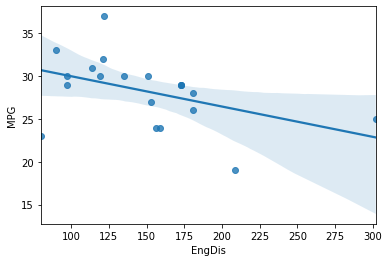

In [ ]:
ax = sns.regplot(x="EngDis", y="MPG", data=cars_df)

In [ ]:
b1_lower = b1 - stats.t.isf(0.025, 18)*(math.sqrt(mse/sxx))
b1_upper = b1 + stats.t.isf(0.025, 18)*(math.sqrt(mse/sxx))
print(b1_lower, b1_upper)

-0.07033143711512013 -0.0004627209732517776


There is a strong indication that the points lie scattered randomly around a straight line. It is reasonable to assume that the mean of the random variable Y is related to X by a straight-line relationship.

There is a distribution of Y-values at each x and that the variance of this distribution is the **same** at each x.
The values of the intercept $\beta_0$, slope $\beta_1$, and the error variance $\sigma^2$ **are not known**, and they must be estimated from sample data.

Sometimes a model like this will arise from a theoretical relationship. 

However, in many real-life cases, no theoretical knowledge of
the relationship between x and y arise. In such cases, the regression model is considered as an **empirical model**.

### **Example 4**

Let's recall the spot freight case study.

In [ ]:
from google.colab import files
uploaded=files.upload()
import io
freight=pd.read_csv(io.StringIO(uploaded['Data_update.csv'].decode('utf-8')))
print(freight)

Saving Data_update.csv to Data_update.csv
    Spot rate  Oil Price  ...  Exporter PMI  Importer PMI
0        1861     108.12  ...          50.4          54.9
1        1858     109.37  ...          50.8          55.4
2        1687     112.94  ...          51.0          55.3
3        1786     107.70  ...          51.7          57.1
4        2065     103.02  ...          51.1          59.0
..        ...        ...  ...           ...           ...
60       1541      71.62  ...          50.1          52.8
61       1324      70.69  ...          49.4          52.1
62       1340      62.22  ...          49.4          51.7
63       1515      63.97  ...          49.7          51.2
64       1340      59.63  ...          49.5          49.1

[65 rows x 11 columns]


#### **a. Fit a multiple linear regression model to this dataset.**

In [ ]:
#@title
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

Q1 = freight.quantile(0.25)
Q3 = freight.quantile(0.75)
IQR = Q3 - Q1

freight = freight[~((freight< (Q1 - 1.5 * IQR)) |(freight> (Q3 + 1.5 * IQR))).any(axis=1)]

names = freight.columns
scaler = MinMaxScaler()
freight = scaler.fit_transform(freight)
freight = pd.DataFrame(freight, columns=names)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
import statsmodels.api as sm

X = freight[['Oil Price','Currency','Exporter CPI','Exporter GDP','Exporter Capacity', 'Importer Capacity','Exporter PMI']] 

y = freight['Spot rate']

X = sm.add_constant(X)
mlr = sm.OLS(y, X).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:              Spot rate   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     5.069
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           0.000196
Time:                        05:56:18   Log-Likelihood:                 14.460
No. Observations:                  60   AIC:                            -12.92
Df Residuals:                      52   BIC:                             3.834
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1243      0.13

#### **b. Calculate t-test statistics for each regression coefficient. Using $\alpha$ = 0.05, what conclusions can be drawn? Do all variables contribute to the model?**

Before running t-statistic, we should identify the null and alternative hypotheses.

$H_0$ : $\beta_1 = \beta_2 = \beta_3 = ... = \beta_7 = 0$

$H_1$ : $\beta_j \ne 0$

> t-test can be written as: 

$t_0 = \frac{\beta_j - \beta{j,0}}{se(\beta_j)}$

Let's calculate t-statistic for each regression coefficient:

In [ ]:
t0_b0 = (mlr.params[0] - 0)/mlr.bse[0]
t0_b1 = (mlr.params[1] - 0)/mlr.bse[1]
t0_b2 = (mlr.params[2] - 0)/mlr.bse[2]
t0_b3 = (mlr.params[3] - 0)/mlr.bse[3]
t0_b4 = (mlr.params[4] - 0)/mlr.bse[4]
t0_b5 = (mlr.params[5] - 0)/mlr.bse[5]
t0_b6 = (mlr.params[6] - 0)/mlr.bse[6]
t0_b7 = (mlr.params[7] - 0)/mlr.bse[7]

print(t0_b0, t0_b1, t0_b2, t0_b3, t0_b4, t0_b5, t0_b6, t0_b7)

for i in range(len(mlr.params)):
  if (mlr.tvalues[i] > stats.t.isf(0.025, 52)):
     Hypothesis_Status = 'Reject Null Hypothesis : Significant'
  else:
     Hypothesis_Status = 'Do not reject Null Hypothesis : Not Significant'
  print("For t" + str(i), " ", Hypothesis_Status)

#p_value = 2*(1- stats.t.cdf(t0_b0,52))
#print(p_value)

0.9104550733237123 5.58559482590126 3.4767929220499987 -1.0003316248351486 -1.4640896691228504 -1.273864750112317 0.22159276186352367 -2.3783840798370144
For t0   Do not reject Null Hypothesis : Not Significant
For t1   Reject Null Hypothesis : Significant
For t2   Reject Null Hypothesis : Significant
For t3   Do not reject Null Hypothesis : Not Significant
For t4   Do not reject Null Hypothesis : Not Significant
For t5   Do not reject Null Hypothesis : Not Significant
For t6   Do not reject Null Hypothesis : Not Significant
For t7   Do not reject Null Hypothesis : Not Significant


#### **c. Test for significance of regression using $\alpha$ =0.05. What conclusions can you draw?**

Recall the significance of regression test.

$F_0 = \frac{SSR/k}{SSE/(n-p)} = \frac{MSR}{MSE}$

This test refers to f-statistic. Obtaining the f-test critical values, p-value can be calculated and compared with critical values.

Let's find error sum of squares and regression sum of squares.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

fitted = mlr.predict(X)

predicts= {'actual':y,'predicted':fitted}

f_test = pd.DataFrame(predicts,columns = ['actual', 'predicted'])
f_test.head()

f_test['errors'] = f_test['actual'] - f_test['predicted']
f_test.head()

f_test['squared errors'] = f_test['errors']**2
print(f_test.head())

sse = f_test['squared errors'].sum()
print(sse)

mean = f_test['actual'].mean()
mean

f_test['squared regression'] =  (f_test['predicted']-mean)**2
f_test.head()

ssr = f_test['squared regression'].sum()
print(ssr)

sst = sse+ssr

msr = ssr/7
print(msr)

mse = sse/52
print(mse)

f_stats = msr/mse
print(f_stats)

p_value = (1- stats.f.cdf(f_stats, 7, 52))
print(p_value)

   actual  predicted  errors  squared errors
0    0.81       0.94   -0.13            0.02
1    0.71       0.72   -0.01            0.00
2    0.70       0.69    0.01            0.00
3    0.73       0.43    0.29            0.09
4    0.74       0.41    0.33            0.11
2.1694083699311615
1.4803010892410666
0.21147158417729522
0.041719391729445415
5.068903821721812
0.00019591935536256155
